In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

df=yf.download("BTC-EUR",start='2010-01-01') #df
# df.Close.rolling?

[*********************100%***********************]  1 of 1 completed


In [3]:
type(df.Close)

pandas.core.series.Series

In [24]:
def strategy(df,sma1,sma2):
    df = df.copy()
    df['ret'] = np.log(df.Close.pct_change()+1)
    df['SMA1'] = df.Close.rolling(sma1).mean()
    df['SMA2'] = df.Close.rolling(sma2).mean()
    df = df.dropna()
    df['position']= np.where(df['SMA1'] > df['SMA2'],1,0)
    
    df['stratret']= df['position'].shift(1)*df['ret']
    df['position2']= np.where(df['SMA1'] == df['SMA2'],1,0)
    df.dropna()
    print(df['position'])
    return df
#df
obj = strategy(df,20,50)
diff = obj.SMA1-obj.SMA2
cross = np.sign(diff.shift(1))!=np.sign(diff)
type()
# for i in cross:
#     if i == True:
#         print(i)
#np.sum(cross)-1


Date
2014-11-05    0
2014-11-06    0
2014-11-07    0
2014-11-08    0
2014-11-09    0
             ..
2022-03-25    1
2022-03-26    1
2022-03-27    1
2022-03-28    1
2022-03-29    1
Name: position, Length: 2702, dtype: int32


TypeError: type() takes 1 or 3 arguments

In [22]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
ser['a'].sh

1

In [11]:
def performance(df):
     return np.exp(df[['ret','stratret']].sum())

In [12]:
performance(strategy(df,20,50))

ret         163.622526
stratret    169.063392
dtype: float64

In [13]:
stratdf = strategy(df,20,50)

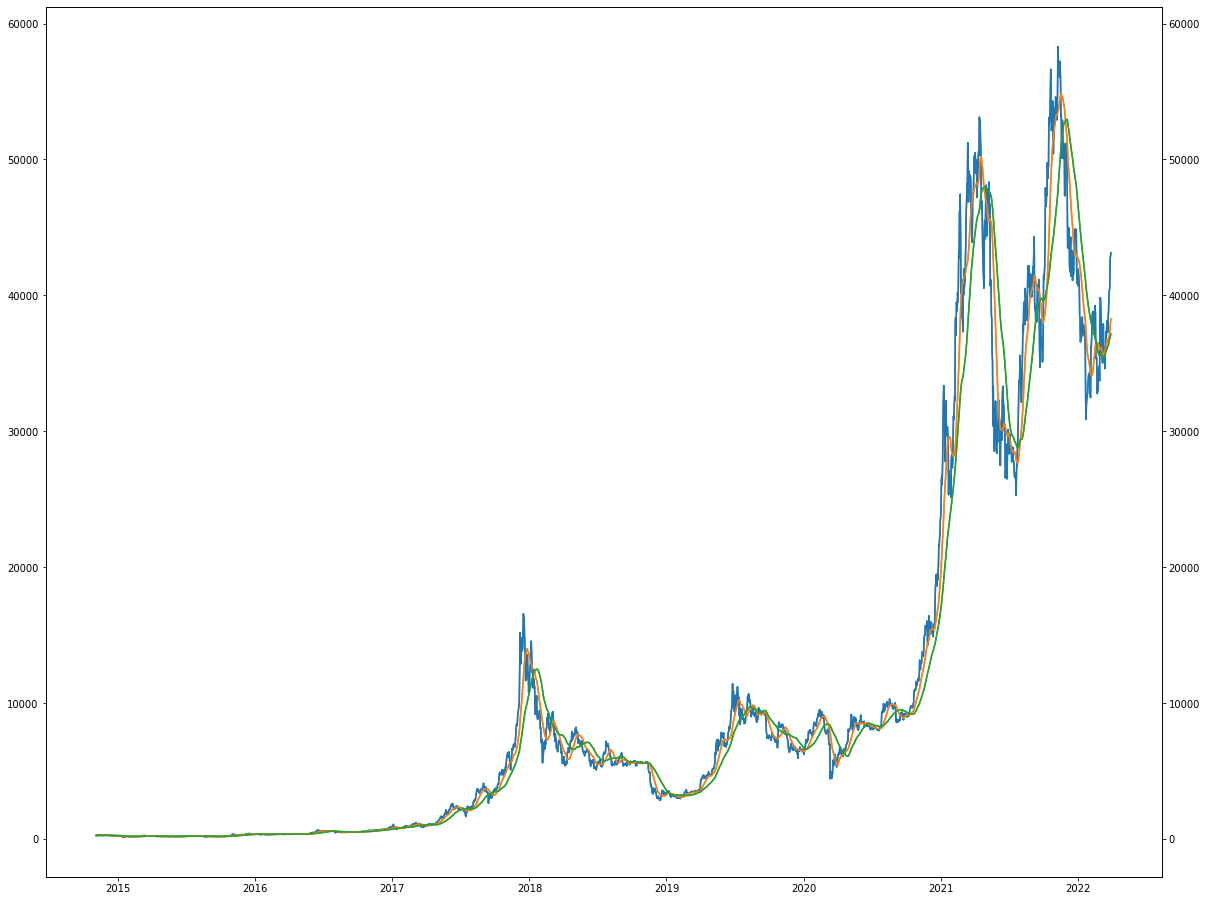

In [8]:
fig,ax = plt.subplots(figsize=(20,16))
ax2=ax.twinx()
ax.plot(stratdf[['Close','SMA1','SMA2']])
ax2.plot(stratdf[['Close','SMA1','SMA2']])